#   Lawlor17 dataset 
The Lawlor17 dataset consists of single cell transcriptomes of 638 human islet cells obtained from five non-diabetic and three type 2 diabetic cadaveric organ donors
## Reference:  
Lawlor N, George J, Bolisetty M, et al. Single-cell transcriptomes identify human islet cell signatures and reveal cell-type-specific expression changes in type 2 diabetes. Genome Res. 2017;27(2):208-222. doi:10.1101/gr.212720.116
## GEO: 
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE86469

preprocessinig as previusly discribed in: https://github.com/SCCAF/sccaf_example/blob/master/preprocessing/%5BGroundTruth%5DHuman_Pancreas_Lawlor.ipynb

please follow instructions on attached notebook


In [6]:
import scanpy as sc
from KMDHierarchicalClustering.KMDAlgo import KMDClustering
from KMDHierarchicalClustering import cluster_scoring
from KMDHierarchicalClustering.preprocessing import filter_genes , obs_names_to_numbers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
import time 
%matplotlib inline

In [2]:
# load preprocessed dataset 
path = 'sccaf_example/preprocessing/' # suggested path  
adata = sc.read(path + 'Lawlor2017Pancreas_reg.h5')
t = time.time()

In [3]:
# convert cluster names to numbers
y_true = []
label_dict = {}
index = 1

for cell in adata.obs['cell']:
    if cell in label_dict:
        y_true.append(label_dict[cell])
    else:
        label_dict[cell] = index
        y_true.append(label_dict[cell])
        index += 1
X = adata.X.toarray() 

Predicted k is : 10
8


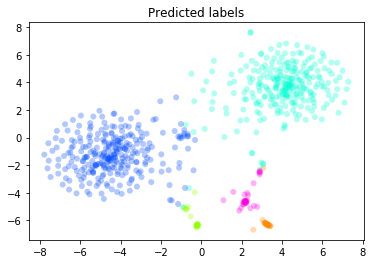

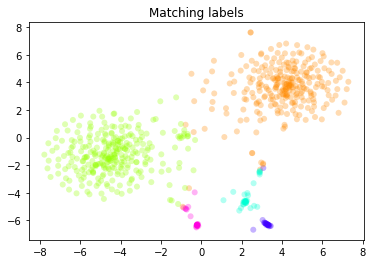

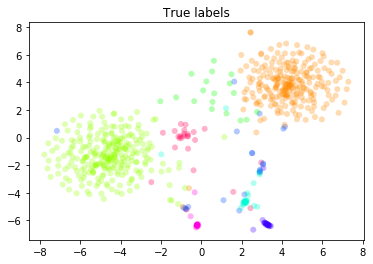

In [4]:
X = adata.X.toarray()
kmd_cluster = KMDClustering(k='compute',affinity = 'correlation',n_clusters=7, min_cluster_size= 10 , certainty=0.5, k_scan_range = (10,20,10))
kmd_cluster.fit(X)
y_pred = kmd_cluster.predict(X)
cluster_scoring.tsne_presentation(kmd_cluster.dists,y_true,y_pred)

In [5]:
print ('NMI')
print (normalized_mutual_info_score(y_true, y_pred))
print ('ARI')
print (adjusted_rand_score(y_true, y_pred))
print('accuracy')
print(cluster_scoring.hungarian_acc(y_true, y_pred)[0])
print('Total running time on toy dataset: '+str(time.time()-t)+ ' seconds')

NMI
0.795988758734527
ARI
0.841132911177645
accuracy
0.8949843260188087
Total running time on toy dataset: 51.06550717353821 seconds
